# 05 Data Preparation for Deep Learning
The time series data need to be sequence into X-feature and Y-label before feed into the supervised deep learning model.This lab will guide you through from the basics of sequencing raw time series data into structure suitable for supervised learning task, and ways to transform time series data into 3-dimensional structure in PyTorch to feed into **Long short-term memory (LSTM)** and transpose the data dimension to feed into **Convolution Neural Network (CNN)**. 

At the end of this lab, you will be able to:

1. Transform a time series dataset into a X-feature and Y-label base 
2. Transform a it into a three-dimensional structure.
3. Learn how to transpose the data dimension before feed into CNN 

As shown in below , give a certain length of window size, the window will sliding throught the data and make the data within the window as x-feature , the value next to the last value of window will be the y-label. 
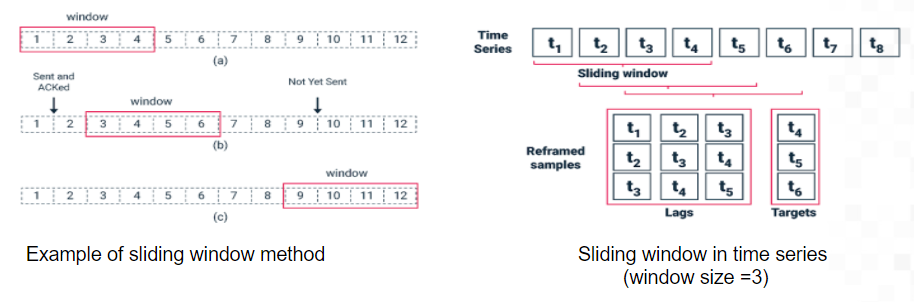

But first let us import some necessary libraries for this lab.

In [33]:
# importing required libraries or modules for this lab
import numpy as np 
import pandas as pd
import torch

# Univariate Data Prepation

First , let's get started with Univariate Data Preparation , the below consist of two part of demostration:
1. Data Sequencing in Univariate for Single Step Forecast 
2. Data Sequecing in Univariate for Multi-step Forecast

## Data Sequencing in Univariate for Single Step Forecast
The univariate data is sequence by using sliding window method in such a way that :

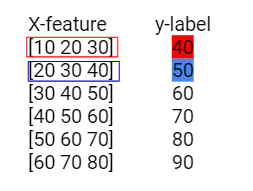
In this case , the window size = 3 

First , we create an example series consist of 10 data point by using array from numpy library

In [3]:
# Example of time series
univariate_series = np.array([1,2,3,4,5,6,7,8,9,10])
print(univariate_series.shape)

(10,)


Due to there is no function in python that can auto perform the sequecing of data.
Hence ,we need to write our own sequecing function to perform the data sequecing.
The sequencing data is sequece using the concept of indexing and slicing  in python.

There are several step to create the sequecing function :
1. Create empty list() for both x-label & y-feature
2. Create For loop to loop throught the sequece data 
3. Create an **end_ix** variable to store the index number of the last index in x-feature
4. Create a If function to break it if the **end_ix** is more than the length of the time series 
5. Using python indexing and append the result then return the output result 

In [104]:
# split a univariate sequence into samples
def univariate_single_step(sequence, window_size):
    x, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + window_size
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [105]:
# calling the function to transform time series into features and labels
x_feature, y_label = univariate_single_step(univariate_series,window_size = 3)

# print the dimension x-feature and y-label
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = total number of data after sequecing")
print(str(x_feature.shape[1])+" = window size\n")
print("y-label\n"+str(y_label.shape[0])+" = total number of data after sequecing\n")

# printing out each sample
for i in range(len(x_feature)):
    print(x_feature[i], y_label[i])

Features are now in the shape of (7, 3) while labels are now in the shape of (7,)

x-feature
7 = total number of data after sequecing
3 = window size

y-label
7 = total number of data after sequecing

[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


## Data Sequecing in Univariate for Multi-step Forecast

The concept for sequence in multi-step is similar to data sequence in single step.
The only different is an extra out_ix is introduce to indexing the Y-label data. 
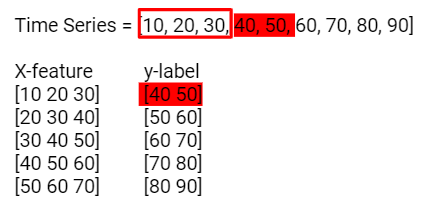
In this case , Multi-step = 2

There are several step to create the sequecing function for multistep:
1. Create empty list() for both x-label & y-feature
2. Create For loop to loop throught the sequece data
3. Create an end_ix variable to store the index number of the last index for the x-feature.
4. Create an out_ix variable by adding the end_ix for x-feature with the the number of step.
4. Create a If function to break it if the out_ix is exist the length of the time series.
5. Using python indexing and append the result then return the output result.

In [7]:
def univariate_multi_step(sequence,window_size,n_multistep):
    x, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + window_size
        out_ix = end_ix+n_multistep
        # check if we are beyond the sequence
        if out_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [103]:
x_feature, y_label = univariate_multi_step(univariate_series,window_size = 3,n_multistep = 2)

# print the dimension x-feature and y-label
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = total number of data after sequecing ")
print(str(x_feature.shape[1])+" = window size \n")
print("y-label\n"+str(y_label.shape[0])+" = total number of data after sequecing")
print(str(y_label.shape[1])+" = number of step\n")

# printing out each sample
for i in range(len(x_feature)):
    print(x_feature[i], y_label[i])

Features are now in the shape of (6, 3) while labels are now in the shape of (6, 2)

x-feature
6 = total number of data after sequecing 
3 = window size 

y-label
6 = total number of data after sequecing
2 = number of step

[1 2 3] [4 5]
[2 3 4] [5 6]
[3 4 5] [6 7]
[4 5 6] [7 8]
[5 6 7] [8 9]
[6 7 8] [ 9 10]


## Exercise for Univariate (Solution)
Try to apply in AirPassengers data by create single step and multi step for univariate time series


In [9]:
airpassengers = pd.read_csv('../datasets/decomposition/AirPassengers.csv')
airpassengers_ts = pd.Series(airpassengers['#Passengers'].values, 
                            index = pd.date_range('1949-01', periods = len(airpassengers), freq='M'))
airpassengers_ts

1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Length: 144, dtype: int64

## Data Sequecing for Univariate in Single Step 

In [12]:
# call the univariate sequecing function
x_feature, y_label = univariate_single_step(airpassengers_ts, window_size = 5)
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}")
#print out sample
for i in range(10):
    print(x_feature[i], y_label[i])

Features are now in the shape of (139, 5) while labels are now in the shape of (139,)
[112 118 132 129 121] 135
[118 132 129 121 135] 148
[132 129 121 135 148] 148
[129 121 135 148 148] 136
[121 135 148 148 136] 119
[135 148 148 136 119] 104
[148 148 136 119 104] 118
[148 136 119 104 118] 115
[136 119 104 118 115] 126
[119 104 118 115 126] 141


## Data Sequecing for Univariate in Multi Step 

In [13]:
x_feature, y_label = univariate_multi_step(airpassengers_ts, window_size = 5, n_multistep = 2)
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}")

# printing out sample
for i in range(10):
    print(x_feature[i], y_label[i])

Features are now in the shape of (138, 5) while labels are now in the shape of (138, 2)
[112 118 132 129 121] [135 148]
[118 132 129 121 135] [148 148]
[132 129 121 135 148] [148 136]
[129 121 135 148 148] [136 119]
[121 135 148 148 136] [119 104]
[135 148 148 136 119] [104 118]
[148 148 136 119 104] [118 115]
[148 136 119 104 118] [115 126]
[136 119 104 118 115] [126 141]
[119 104 118 115 126] [141 135]


# Multivariate Data Preparation
In multivariate Data Preparation , it can categories into 2 types such as : 
1. Multivariate Input , Univariate Output
2. Multivariate Input , Multivariate Output

<img src= "../picture/Multivariate Data Sequencing.PNG" width =500 height = 300>
The concept of sequecing is similar with the Univariate Sequecing , just some modification need to be make

## Single Step Forecast

## Multivariate Input , Univariate Output for Single Step Forecast

First , we create an example with 2 input series data and 1 output series data by using numpy array and reshape it to **[ total of number of data , 1 ]** before stack them together . 
The window is sliding in vertically : --> Direction of window slicing 


 |&nbsp;  [ 10,  15,  25],\
 |&nbsp;   [ 20,  25,  45],\
 |&nbsp;   [ 30,  35,  65],\
 |&nbsp;   [ 40,  45,  85],\
v&nbsp;   [ 50,  55, 105],


In [14]:
# Create Synthetic data 
series1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
series2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
outputseries = np.array([25,45,65,85,105,125,145,165,185])

series1 = series1.reshape(len(series1),1)
series2 = series2.reshape(len(series2),1)
outputseries = outputseries.reshape(len(outputseries),1)
#horizontally stack column
multivariate_dataset = np.hstack((series1,series2,outputseries))
multivariate_dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

There are several step to create the sequecing function for multivariate input , univariate output :
1. Create empty list() to store the value need to be append later for both x-label & y-feature
2. Create For loop to loop throught the sequence data
3. Create an end_ix variable to store the index number of the last index in the window.
5. Create a If function to break it if the end_ix is more than the length of the time series.
6. Using python indexing and append the result then return the output result.

For example : \
i = 0, window size = 2  where **end_ix = i + window size** --> **end_ix = 0+2 = 2**

Hence **end_ix = 2** --> **seq_x = sequence [0: 2 , : -1]**\
[ 10,  15]\
[ 20,  25]

**y_ix = end_ix - 1** ---> **y_ix = 2-1** --> **y_ix = 1**     
seq_y = sequence[1,-1] \
[45]

In [168]:
def multivariate_univariate_single_step(sequence,window_size):
    x, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + window_size
        # check if we are beyond the sequence
        if end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix-1,-1]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [169]:
x_feature, y_label = multivariate_univariate_single_step(multivariate_dataset, window_size = 2)
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = total number of data ")
print(str(x_feature.shape[1])+" = window size ")
print(str(x_feature.shape[2])+" = number of time series\n")
print("y-label\n"+str(y_label.shape[0])+" = number of data\n")


# printing out sample
for i in range(5):
    print(x_feature[i], y_label[i])

Features are now in the shape of (8, 2, 2) while labels are now in the shape of (8,)

x-feature
8 = total number of data 
2 = window size 
2 = number of time series

y-label
8 = number of data

[[10 15]
 [20 25]] 45
[[20 25]
 [30 35]] 65
[[30 35]
 [40 45]] 85
[[40 45]
 [50 55]] 105
[[50 55]
 [60 65]] 125


## Multivariate Input , Multivariate Output for Single Step Forecast
The concept of preparing the sequencing of **Multivariate Input , Multivariate Output** is similar with the **Multivariate Input , Univariate Output** but instead of y-label just 1 single input series , it is base on the number of output series . For example :
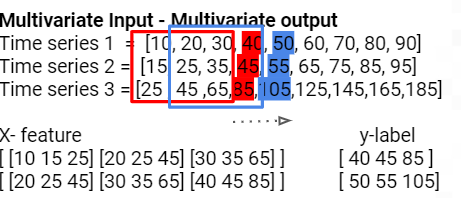
In this case, 3 input time series data , output 3 time series data

In [15]:
# Create Synthetic data 
series1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
series2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
series3 = np.array([25,45,65,85,105,125,145,165,185])

series1 = series1.reshape(len(series1),1)
series2 = series2.reshape(len(series2),1)
series3 = series3.reshape(len(series3),1)
#horizontally stack column
multivariate_output_dataset = np.hstack((series1,series2,series3))
multivariate_output_dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

The concept is almost same in **Multivariate Input , Univariate Output** , instead of using -1 in indexing the output series , it use **[ : ]** to take all data point horizontally and make into x-feature and y-label

There are several step to create the sequecing function for multivariate Input , multivariate Output :

1. Create empty list() for both x-label & y-feature
2. Create For loop to loop throught the sequece data
3. Create an end_ix variable to store the index number of the last index in the window
4. Create a If function to break it if the end_ix is more or equal to the length of the time series.
5. Using python indexing and append the result then return the output result.

In [171]:
def multivariate_multivariate_single_step(sequence,window_size):
    x, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + window_size
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:], sequence[end_ix,:]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [172]:
x_feature, y_label = multivariate_multivariate_single_step(multivariate_output_dataset, window_size = 4)
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = number of data ")
print(str(x_feature.shape[1])+" = window size ")
print(str(x_feature.shape[2])+" = number of time series\n")
print("y-label\n"+str(y_label.shape[0])+" = number of data")
print(str(y_label.shape[1])+" = number of step\n")

# printing out sample
for i in range(x_feature.shape[0]):
    print(x_feature[i], y_label[i])

Features are now in the shape of (5, 4, 3) while labels are now in the shape of (5, 3)

x-feature
5 = number of data 
4 = window size 
3 = number of time series

y-label
5 = number of data
3 = number of step

[[10 15 25]
 [20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


## Multi- Step Forecast
The data sequencing in multi-step forecast for multivariate is same with the concept of **univariate multi-step forecast** , the modification is make in the indexing of y-label data :


## Multivariate Input , Univariate Output for Multi Step Forecast

In [17]:
# Create Synthetic data 
series1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
series2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
outputseries = np.array([25,45,65,85,105,125,145,165,185])

series1 = series1.reshape(len(series1),1)
series2 = series2.reshape(len(series2),1)
outputseries = outputseries.reshape(len(outputseries),1)
#horizontally stack column
multivariate_dataset2 = np.hstack((series1,series2,outputseries))
multivariate_dataset2

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

<img src= "../picture/multivariate univariate.PNG" width =400 height = 400>
There are several step to create the sequecing function for multivariate Input , multivariate Output :

1. Create empty list() for both x-label & y-feature
2. Create For loop to loop throught the sequece data
3. Create an end_ix variable to store the index number of the last index for the x-feature.
4. Create an out_ix variable by  end_ix + number of multistep -1 , the -1 is due to the python indexing 
4. Create a If function to break it if the out_ix is to the length of the time series.
5. Using python indexing and append the result then return the output result.

For example : 

i = 0, window size = 3 , n_multistep = 2 \
where **end_ix = i + window size**

Hence **end_ix = 3** --> **seq_x = sequence [0: 3,: -1]**\
[ 10, 15]\
[ 20, 25]\
[ 30, 35]

**y_ix = end_ix-1 --> 3-1**\
**y_ix = 2** \
**out_ix = end_ix + n_multistep -1** --> **out_ix = 3+2-1**\
Hence out_ix = 4

**seq_y = sequence[ y_ix:out_ix,-1 ]**
      **= sequence[2:4 , -1]**\
[65 85]

The -1 in the equation --> **out_ix = end_ix + n_multistep -1** \
is use to make sure the y-label is in the range of value that we want : 

What if **out_ix = end_ix + n_multistep**\
**out_ix = 3+2 = 5** \
**seq_y =sequence[ y_ix:out_ix,-1 ]**\
      **=sequence[2:5 , -1]**\
[65 85 105]
which is 3 step , is not same as we set initial  n_multistep = 2

In [21]:
def multivariate_univariate_multi_step(sequence,window_size,n_multistep):
    x, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + window_size
        out_ix = end_ix + n_multistep -1
        # check if we are beyond the sequence
        if out_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix-1:out_ix,-1]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [22]:
x_feature, y_label = multivariate_univariate_multi_step(multivariate_dataset2, window_size = 3 ,n_multistep = 2)
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = total number of data ")
print(str(x_feature.shape[1])+" = window size ")
print(str(x_feature.shape[2])+" = number of time series\n")
print("y-label\n"+str(y_label.shape[0])+" =number of data")
print(str(y_label.shape[1])+" =number of step\n")

# printing out sample
for i in range(x_feature.shape[0]):
    print(x_feature[i], y_label[i])

Features are now in the shape of (6, 3, 2) while labels are now in the shape of (6, 2)

x-feature
6 = total number of data 
3 = window size 
2 = number of time series

y-label
6 =number of data
2 =number of step

[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]


## Multivariate Input , Multivariate Output for Multi Step Forecast


In [23]:
# Create Synthetic data 
series1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
series2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
series3 = np.array([25,45,65,85,105,125,145,165,185])

series1 = series1.reshape(len(series1),1)
series2 = series2.reshape(len(series2),1)
series3 = series3.reshape(len(series3),1)
#horizontally stack column
multivariate_output_dataset_multi = np.hstack((series1,series2,series3))
multivariate_output_dataset_multi

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

<img src= "../picture/multivariate multivariate.PNG" width =400 height = 400>
Step to create Multivariate input,multivariate output multi-step forecast

1. Create empty list() for both x-label & y-feature
2. Create For loop to loop throught the sequece data
3. Create an end_ix variable to store the index number of the last index for the x-feature.
4. Create an out_ix variable by using end_ix + n_multistep 
4. Create a If function to break it if the end_ix is more than or equal to the length of the time series.
5. Using python indexing and append the result then return the output result.

The sequence is taking all the data point horizontally using **[ : ]**

In [25]:
def multivariate_multivariate_multi_step(sequence,window_size,n_multistep):
    x, y = list(),list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + window_size
        out_ix = end_ix + n_multistep
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:], sequence[end_ix:out_ix,:]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y,dtype='object')

In [178]:
x_feature, y_label = multivariate_multivariate_multi_step(multivariate_output_dataset_multi, window_size = 4 ,n_multistep = 3)
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = total number of data ")
print(str(x_feature.shape[1])+" = window size ")
print(str(x_feature.shape[2])+" = number of time series\n")
print("y-label\n"+str(y_label.shape[0])+" =number of data\n")


# printing out sample
for i in range(x_feature.shape[0]):
    print(x_feature[i], y_label[i])

Features are now in the shape of (5, 4, 3) while labels are now in the shape of (5,)

x-feature
5 = total number of data 
4 = window size 
3 = number of time series

y-label
5 =number of data

[[10 15 25]
 [20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]]
[[ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [[ 90  95 185]]


In [179]:
# Easy to view
list(y_label)

[array([[ 50,  55, 105],
        [ 60,  65, 125],
        [ 70,  75, 145]]),
 array([[ 60,  65, 125],
        [ 70,  75, 145],
        [ 80,  85, 165]]),
 array([[ 70,  75, 145],
        [ 80,  85, 165],
        [ 90,  95, 185]]),
 array([[ 80,  85, 165],
        [ 90,  95, 185]]),
 array([[ 90,  95, 185]])]

# Preparing 3-Dimensional Data
Preparing time series data for CNNs and LSTMs requires one additional step beyond transforming
the data into a supervised learning problem.\
Some configuration is needed in building the LSTM model in Pytorch : \
You will learn : 
1. How to transform and reshape the data for LSTM 
2. Model Configuration for LSTM 
3. How to transform and transpose the data for CNN 


For LSTM , the data need to be arrange in **batch_size = [ total number of data ,window size ,number of time series ]** 

For example,we try to transform the **multivariate input, univariate output** sequence to suit the 3D data format which use for LSTM
    

In [76]:
# call function to perform sequencing
X_feature, Y_label = univariate_multi_step(univariate_series,window_size = 3,n_multistep = 2)

# Print the statement 
print(f"Features are now in the shape of {x_feature.shape} while labels are now in the shape of {y_label.shape}\n")
print("x-feature\n"+str(x_feature.shape[0])+" = total number of data after sequecing ")
print(str(x_feature.shape[1])+" = window size \n")
print("y-label\n"+str(y_label.shape[0])+" = total number of data after sequecing")
print(str(y_label.shape[1])+" = number of step\n")
# printing out each sample
for i in range(len(x_feature)):
    print(x_feature[i], y_label[i])

Features are now in the shape of (6, 3) while labels are now in the shape of (6, 2)

x-feature
6 = total number of data after sequecing 
3 = window size 

y-label
6 = total number of data after sequecing
2 = number of step

[1 2 3] [4 5]
[2 3 4] [5 6]
[3 4 5] [6 7]
[4 5 6] [7 8]
[5 6 7] [8 9]
[6 7 8] [ 9 10]


### Step to transform 3D format for LSTM
1. Transform data from numpy array to pytorch tensor 
2. Reshape it to the 3D format that LSTM needed

In [79]:
#  Transform the data from numpy to pytorch tensor
X_feature = torch.from_numpy(x_feature).type(torch.Tensor)
Y_label = torch.from_numpy(y_label).type(torch.Tensor)

In [80]:
#Reshape it to the 3D format that LSTM needed
X_feature = torch.reshape(X_feature,(X_feature.shape[0],X_feature.shape[1],1))
Y_label  = torch.reshape(Y_label ,(Y_label.shape[0],Y_label.shape[1]))

In [81]:
print(f"Features are now in the shape of {X_feature.shape} while labels are now in the shape of {Y_label.shape}\n")
print("x-feature after reshape\n"+str(X_feature.shape[0])+" = total number of data after sequecing ")
print(str(X_feature.shape[1])+" = window size")
print(str(X_feature.shape[2])+" = lastest reshape dimension \n")
print("y-label\n"+str(Y_label.shape[0])+" = total number of data after sequecing")
print(str(Y_label.shape[1])+" = number of step\n")

Features are now in the shape of torch.Size([6, 3, 1]) while labels are now in the shape of torch.Size([6, 2])

x-feature after reshape
6 = total number of data after sequecing 
3 = window size
1 = lastest reshape dimension 

y-label
6 = total number of data after sequecing
2 = number of step



In LSTM model configuration ,we need declare the input configuration **batch_first = True** due to our data arrange in such a way of \
**batch_size = [ total number of data ,window size ,number of time series ]** 

In [77]:
# Example of LSTM configuration
class LSTM(torch.nn.Module):
    
     def __init__(self, n_feature, hidden_dim, num_layers, output_dim):
                super(LSTM, self).__init__()

                self.n_feature = n_feature
                # Hidden dimensions
                self.hidden_dim = hidden_dim

                # Number of hidden layers
                self.num_layers = num_layers

                # Building your LSTM
                # batch_first=True causes input/output tensors to be of shape
                # (batch_dim, seq_dim, feature_dim)
                self.lstm = nn.LSTM(n_feature, hidden_dim, num_layers, batch_first=True)

                # Readout layer
                self.fc = nn.Linear(hidden_dim, output_dim)
               

## Transpose for CNN 
Due to the pytorch CNN configuration, it expect the data arrange in : 
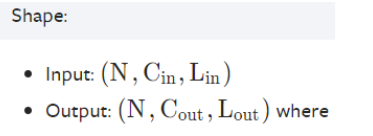
where N = batch size , C = number of channel , L = length of the sequence 

In our case , we take N = total number of data , C = number of time series , L = window size

Hence , we need to transpose our data from **[ total number of data , window size , timeseries] ---->  [ total number of data , timeseries,window size]** \
For example , we will take the x-feature and y-label from the previous 3D data transformation in LSTM and perform the transpose 

### Before transpose

In [98]:
print(f"Features are now in the shape of {X_feature.shape} while labels are now in the shape of {Y_label.shape}\n")
print("x-feature after reshape\n"+str(X_feature.shape[0])+" = total number of data after sequecing")
print(str(X_feature.shape[1])+" = window size")
print(str(X_feature.shape[2])+" = number of time series \n")
print("y-label\n"+str(Y_label.shape[0])+" = total number of data after sequecing")
print(str(Y_label.shape[1])+" = number of step\n")

Features are now in the shape of torch.Size([6, 3, 1]) while labels are now in the shape of torch.Size([6, 2])

x-feature after reshape
6 = total number of data after sequecing
3 = window size
1 = number of time series 

y-label
6 = total number of data after sequecing
2 = number of step



### After Transpose

In [100]:
## After transpose 
X_feature_transpose  = torch.transpose(X_feature ,1,2)

print(f"Features are now in the shape of {X_feature_transpose.shape} while labels are now in the shape of {Y_label.shape}\n")
print("x-feature after reshape\n"+str(X_feature_transpose.shape[0])+" = total number of data after sequecing")
print(str(X_feature_transpose.shape[1])+" = number of time series")
print(str(X_feature_transpose.shape[2])+" = window size\n")
print("y-label\n"+str(Y_label.shape[0])+" = total number of data after sequecing")
print(str(Y_label.shape[1])+" = number of step\n")

Features are now in the shape of torch.Size([6, 1, 3]) while labels are now in the shape of torch.Size([6, 2])

x-feature after reshape
6 = total number of data after sequecing
1 = number of time series
3 = window size

y-label
6 = total number of data after sequecing
2 = number of step



# Reference 

1. Deep Learning for Time Series Forecasting, Jason Brownlee 
2. https://www.kaggle.com/taronzakaryan/stock-prediction-lstm-using-pytorch
3. https://stackoverflow.com/questions/56858924/multivariate-input-lstm-in-pytorch